# SHAP values for all_model

Warning: This notebook is very computationally intensive

Sources:  
https://shap.readthedocs.io/en/latest/generated/shap.KernelExplainer.html  
https://github.com/shap/shap/blob/master/notebooks/tabular_examples/neural_networks/Census%20income%20classification%20with%20Keras.ipynb

Shap version: shap-0.45.0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score

import keras

import tensorflow as tf


In [2]:
def set_reproducible():
    np.random.seed(12345)
    random.seed(12345)
    tf.random.set_seed(12345)
    
set_reproducible()

In [3]:
dps1200 = pd.read_csv("/home/mel/Masterthesis/Masterthesis_code/raw_data/csv/dps1200_all.csv")

In [4]:
dps1200.rename(columns=lambda x: x.replace('X', ''), inplace=True)

In [5]:
y = dps1200.iloc[:,4:]
feature_labels = y.columns.values
feature_wavelengths = feature_labels.astype(int)

In [6]:
features = dps1200.iloc[:, 4:].values
labels = dps1200.iloc[:, 0].values

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [8]:
print(test_data.shape)

(260, 1866)


In [9]:
model_path = "/home/mel/Masterthesis/Masterthesis_code/code/all_data/dps1200all_model.keras"

In [10]:
dps1200all_model = tf.keras.models.load_model(model_path)

# Show the model architecture
dps1200all_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 1866, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1833, 24)       │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 916, 24)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 820, 52)        │       121,108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 410, 52)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21320)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21320)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 422)            │     8,997,462 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           423 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,359,501 (104.37 MB)

 Trainable params: 9,119,833 (34.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,239,668 (69.58 MB)

In [11]:
print(type(dps1200all_model))

<class 'keras.src.models.sequential.Sequential'>


# SHAP

In [12]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

d:\programming\python\first_steps_with_cnns\tensor\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def f(X):
    return dps1200all_model.predict(X).flatten()

In [14]:
print(features.shape)

(1296, 1866)


In [ ]:

# Use the 10-means for representing the dataset
mean_features = shap.kmeans(features, 10)

# Sample the data points that we want to use to compute the shap values for
samples = shap.sample(features, 100)
print(samples.shape)

# Use the kernel exlainer as it's able to exlain an arbitrary function
explainer = shap.KernelExplainer(f, mean_features)

# We need to take more samples than we have features, otherwise we'll get an error
shap_values = explainer.shap_values(features, nsamples=2000)

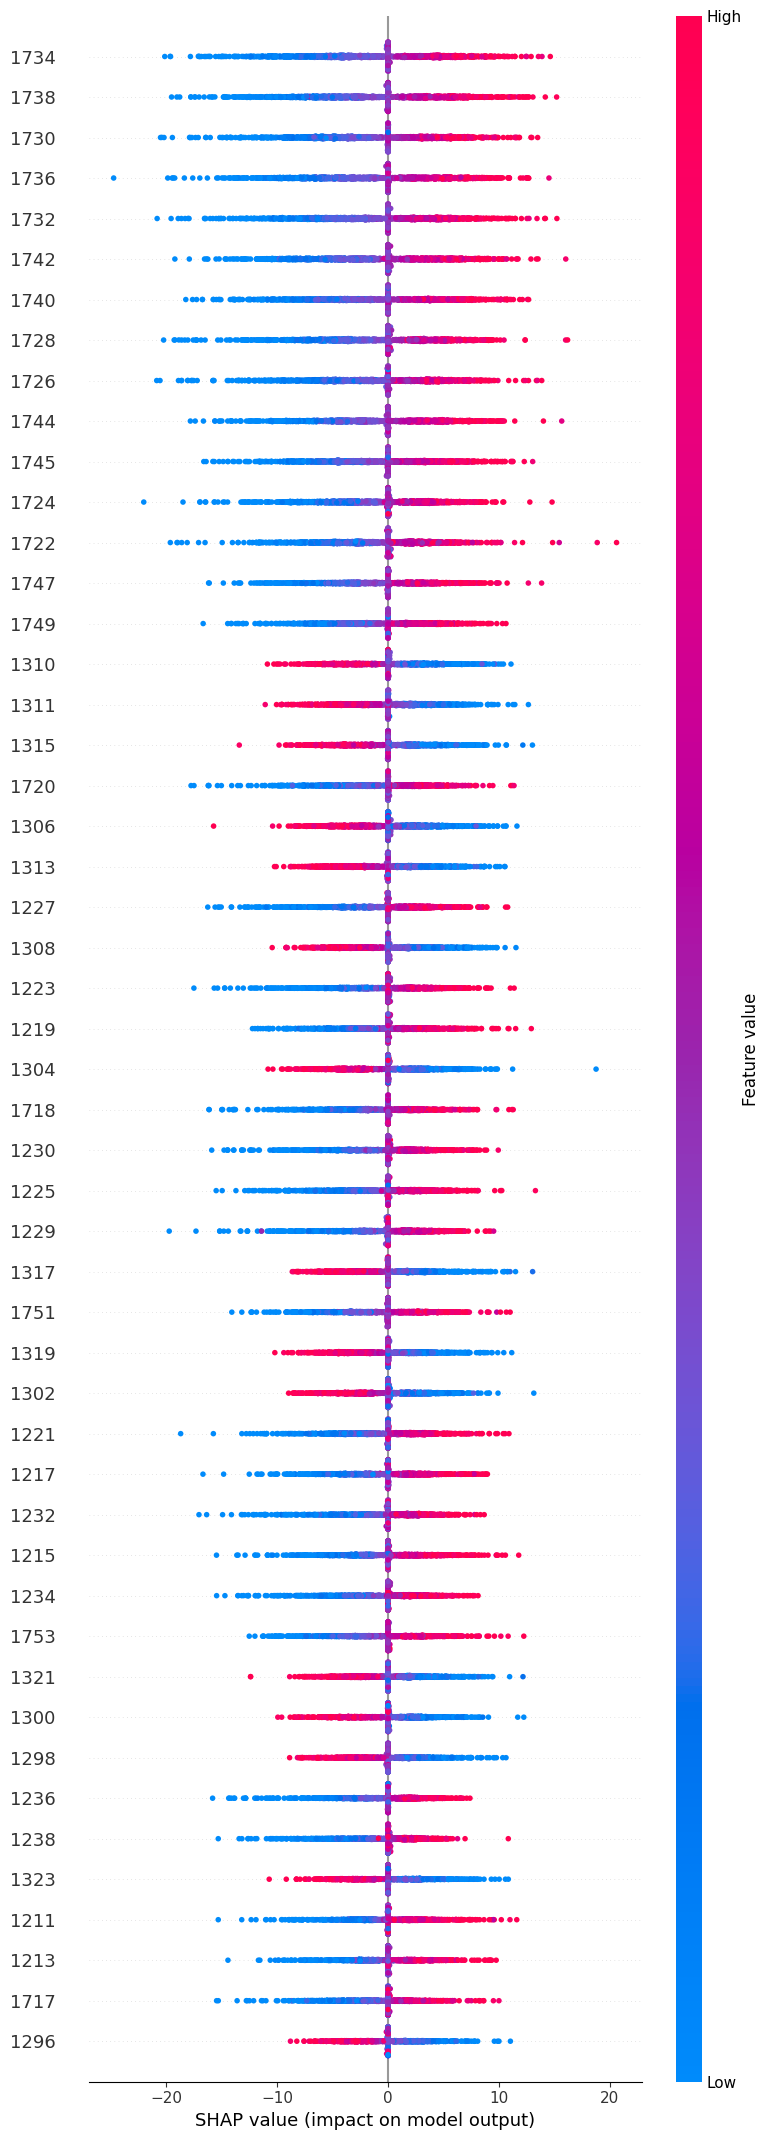

In [17]:
shap.summary_plot(shap_values, features=features, feature_names=feature_labels, max_display=50)

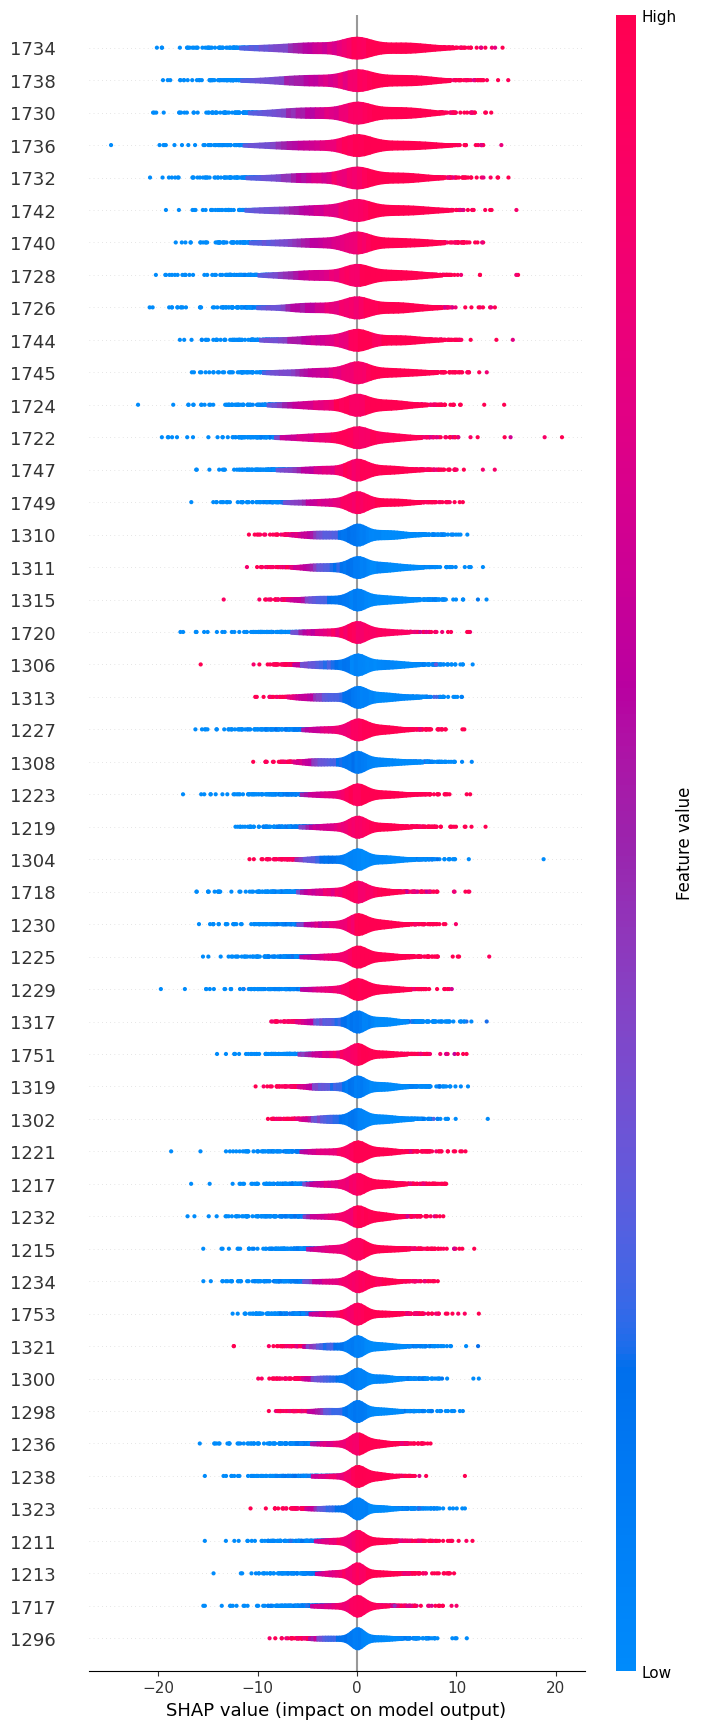

In [19]:
shap.plots.violin(shap_values, features=features, feature_names=feature_labels, max_display=50, plot_type="violin")